## Importing the cleaned dataset

After running `data_prep.ipynb`,  we can use the cleaned dataset stored in `trimmed_data.csv`

In [1]:
import pandas as pd
data = pd.read_csv('trimmed_data.csv')

## Analyzing various trends from the dataset

1. Age Distribution across players - For each year, how many players exist
2. Age Distribution across positions - More detailed data about each position
3. Age Distribution across teams + winrate - Average ages of each team, etc and how much do they win?
4. Age Distribution and G/A - How good is an average player for each age?

### 1. Age Distribution Across Players
For each age, how many players are there?

The graph shows the number of players at each age in the entire league.

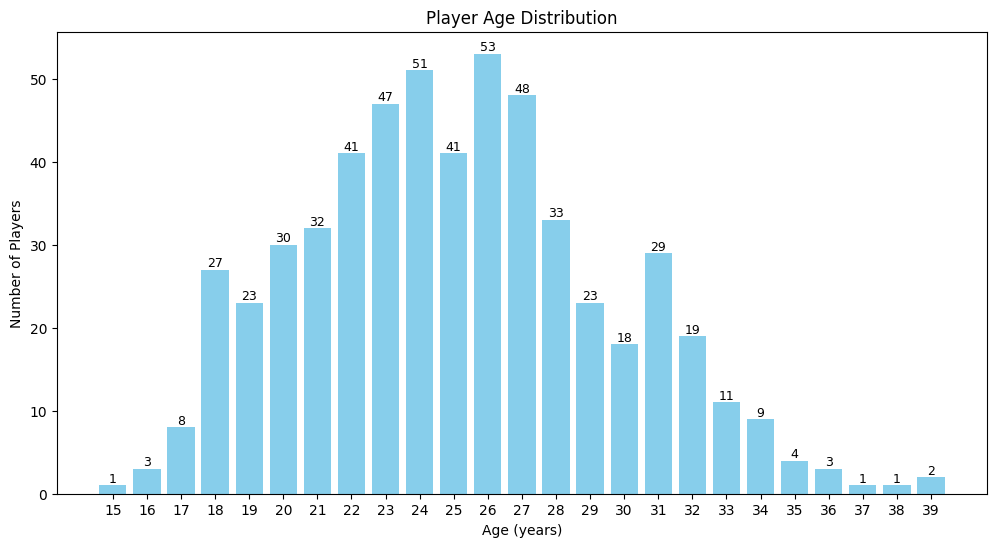

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

age_counts = data['Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age (years)')
plt.ylabel('Number of Players')
plt.title('Player Age Distribution')

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=9)

plt.xticks(age_counts.index)  # Show ticks for every year
plt.show()
# plt.savefig('1_age_distribution_leaguewise.png')

### 2. Age Distribution Across Positions
How is age distributed in each position?

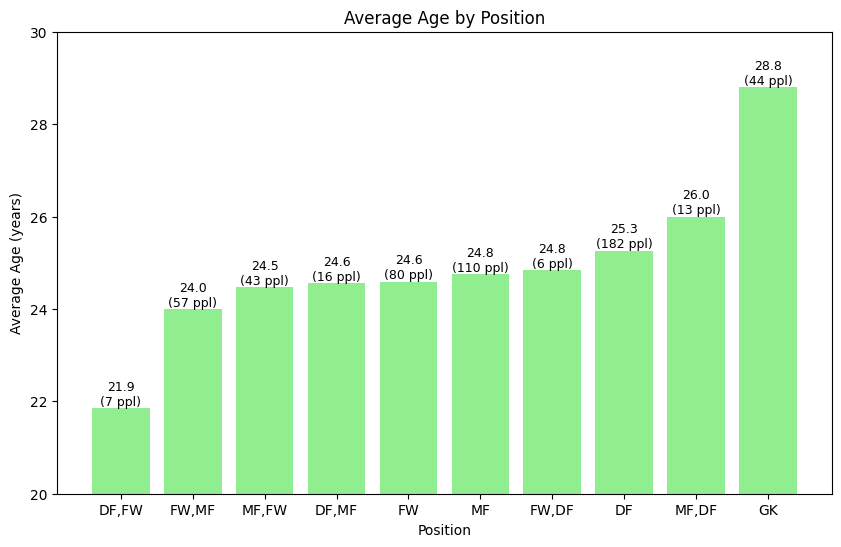

In [51]:
pos_avg_age = data.groupby('Pos')['Age'].mean().sort_values()
pos_counts = data.groupby('Pos')['Age'].count().reindex(pos_avg_age.index)  # ensure matching order

plt.figure(figsize=(10, 6))
bars = plt.bar(pos_avg_age.index, pos_avg_age.values, color='lightgreen')
plt.xlabel('Position')
plt.ylabel('Average Age (years)')
plt.title('Average Age by Position')
plt.ylim(20, 30)

# Add average age and player count labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f}\n({pos_counts.iloc[i]} ppl)',  # multiline label
             ha='center', va='bottom', fontsize=9)

plt.show()
# plt.savefig('2_age_distribution_positionwise.png')

### 3. Age Distribution across teams

For each team in the Premier League, this bar graph shows the average age of each player

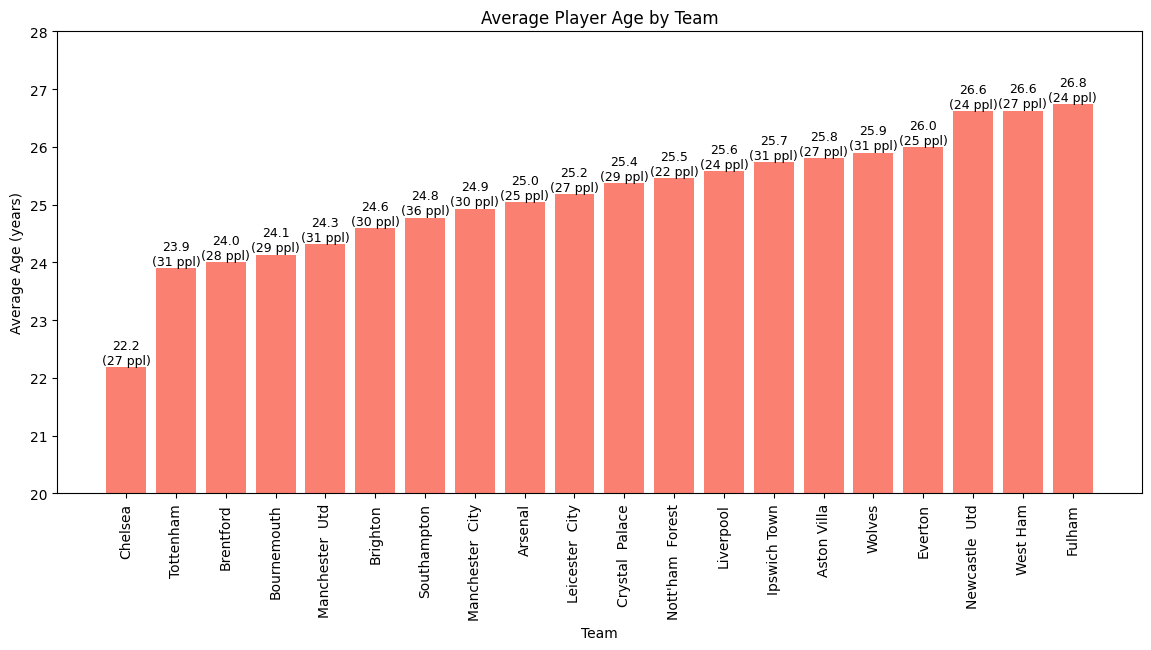

In [48]:
team_age = data.groupby('Squad')['Age'].mean().sort_values()
team_count = data.groupby('Squad')['Age'].count().reindex(team_age.index)  # align with sorted order

plt.figure(figsize=(14, 6))
bars = plt.bar(team_age.index, team_age.values, color='salmon')
plt.xlabel('Team')
plt.ylabel('Average Age (years)')
plt.title('Average Player Age by Team')
plt.xticks(rotation=90)

# Zoom y-axis to 20-28 years
plt.ylim(20, 28)

# Add value labels for average age and number of players on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.1f}\n({team_count.iloc[i]} ppl)',  # multiline label
             ha='center', va='bottom', fontsize=9)

plt.show()

# plt.savefig('3_age_distribution_teamwise.png')

### 4. Age and G+A (Dual-Axis Combo Plot)

Bars: Number of players per age (labels on top).

Line: Average G+A for each age.

Both graphs on one axis, helps explain skew and performance together.

X-axis labels every year.

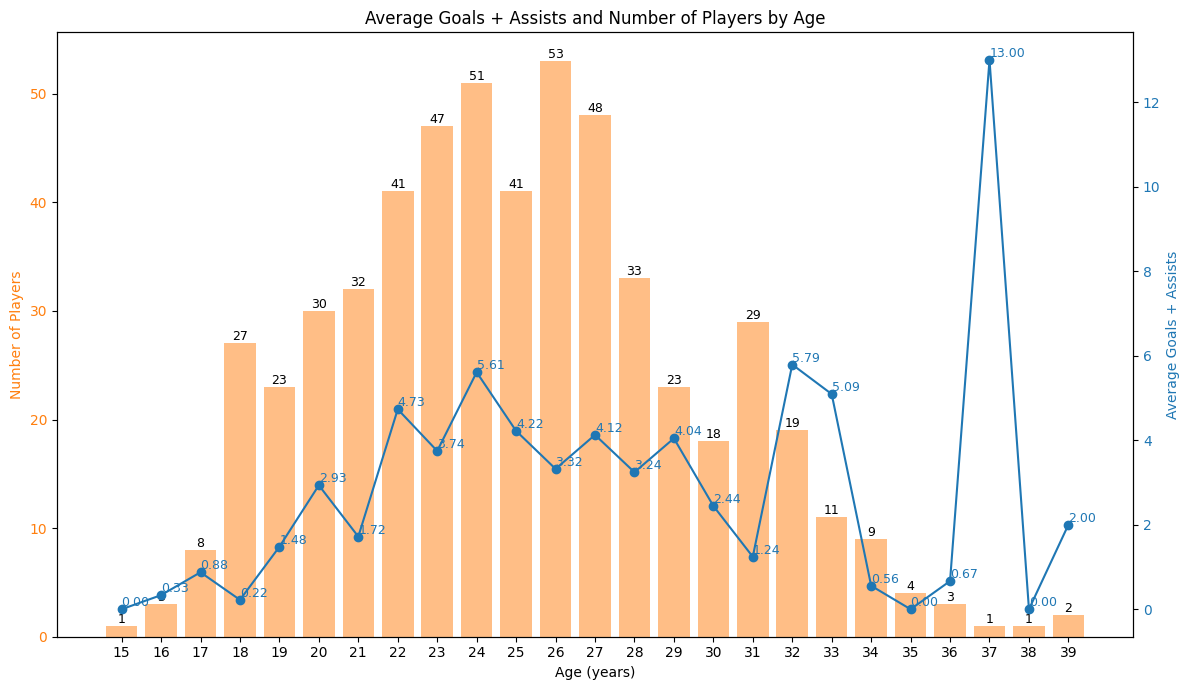

In [ ]:
import numpy as np

ga_by_age = data.groupby('Age')['G+A'].mean()
count_by_age = data['Age'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(12,7))

color_g = 'tab:blue'
color_c = 'tab:orange'
ages = count_by_age.index

# Barplot for player count
bars = ax1.bar(ages, count_by_age.values, color=color_c, alpha=0.5, label='Num. Players')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Number of Players', color=color_c)
ax1.tick_params(axis='y', labelcolor=color_c)
ax1.set_xticks(ages)

# Add labels on barplot
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=9, color='black')

# Lineplot for average G+A
ax2 = ax1.twinx()
ax2.plot(ga_by_age.index, ga_by_age.values, marker='o', color=color_g, label='Avg Goals+Assists')
ax2.set_ylabel('Average Goals + Assists', color=color_g)
ax2.tick_params(axis='y', labelcolor=color_g)

# Add labels to each point on the lineplot
for x, y in zip(ga_by_age.index, ga_by_age.values):
    ax2.text(x, y, f'{y:.2f}', color=color_g, fontsize=9, ha='left', va='bottom')

plt.title('Average Goals + Assists and Number of Players by Age')
fig.tight_layout()
plt.show()
# plt.savefig('4_age_vs_GA.png')

